In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df1 = pd.read_csv('2019-oct1.csv')
df2 = pd.read_csv('2019-nov1.csv')
df3 = pd.read_csv('2019-dec2.csv')

df2.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:02 UTC,view,5802432.0,1.487580e+18,NaN,NaN,0.32,562076640.0,09fafd6c-6c99-46b1-834f-33527f4de241
1,1,2019-11-01 00:00:09 UTC,cart,5844397.0,1.487580e+18,NaN,NaN,2.38,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2,2019-11-01 00:00:10 UTC,view,5837166.0,1.783999e+18,NaN,pnb,22.22,556138645.0,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,3,2019-11-01 00:00:11 UTC,cart,5876812.0,1.487580e+18,NaN,jessnail,3.16,564506666.0,186c1951-8052-4b37-adce-dd9644b1d5f7
4,4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182.0,1.487580e+18,NaN,NaN,3.33,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb


In [4]:
print(df1.isnull().sum())

Unnamed: 0           0
event_time           0
event_type           0
product_id           0
category_id          0
category_code    21732
brand             8970
price                0
user_id              0
user_session         0
dtype: int64


In [5]:
print(df2.isnull().sum())

Unnamed: 0           0
event_time           0
event_type           1
product_id           1
category_id          1
category_code    19707
brand             7987
price                1
user_id              1
user_session        15
dtype: int64


In [6]:
print(df3.isnull().sum())

Unnamed: 0           0
event_time           0
event_type           0
product_id           0
category_id          0
category_code    19956
brand             8523
price                0
user_id              0
user_session        10
dtype: int64


In [7]:
f = df1[df1.duplicated()]
print(f.shape)
g = df2[df2.duplicated()]
print(g.shape)
h = df3[df3.duplicated()]
print(h.shape)

(0, 10)
(0, 10)
(0, 10)


# First doing brand analysis for df2

In [61]:
df2 = df2.drop(columns=['category_code'],axis=1)

In [9]:
df2.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,0,2019-11-01 00:00:02 UTC,view,5802432.0,1.487580e+18,NaN,0.32,562076640.0,09fafd6c-6c99-46b1-834f-33527f4de241
1,1,2019-11-01 00:00:09 UTC,cart,5844397.0,1.487580e+18,NaN,2.38,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2,2019-11-01 00:00:10 UTC,view,5837166.0,1.783999e+18,pnb,22.22,556138645.0,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,3,2019-11-01 00:00:11 UTC,cart,5876812.0,1.487580e+18,jessnail,3.16,564506666.0,186c1951-8052-4b37-adce-dd9644b1d5f7
4,4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182.0,1.487580e+18,NaN,3.33,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb


In [62]:
df2 = df2.dropna(subset = ['brand'])

In [11]:
df2.shape

(12090, 9)

In [12]:
df2['brand'].value_counts()

irisk          1556
runail         1343
masura          955
grattol         628
bpw.style       505
               ... 
lowence           1
sanoto            1
tazol             1
treaclemoon       1
sun               1
Name: brand, Length: 179, dtype: int64

In [13]:
df2.shape

(12090, 9)

In [63]:
df2['event_type'].value_counts()

view                5627
cart                3343
remove_from_cart    2151
purchase             969
Name: event_type, dtype: int64

Text(0, 0.5, 'count')

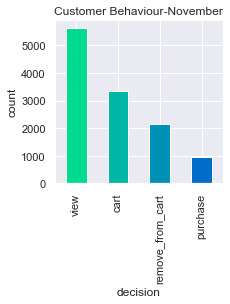

In [19]:
plt.figure(figsize=(3,3))
df2['event_type'].value_counts().plot.bar(color=palette_color)
plt.title('Customer Behaviour-November')
plt.xlabel('decision')
plt.ylabel('count')

In [ ]:
df2['event_type'].value_counts()

In [16]:
df_brand_sales = df2.loc[df2['event_type']=='purchase']
df_brand_sales.shape

(969, 9)

In [17]:
df_brand_sales['brand'].value_counts()

irisk          241
runail          94
masura          92
ingarden        47
bpw.style       40
              ... 
levissime        1
farmstay         1
glysolid         1
dermal           1
beauty-free      1
Name: brand, Length: 87, dtype: int64

Text(0.5, 1.0, 'Most popular brand - November')

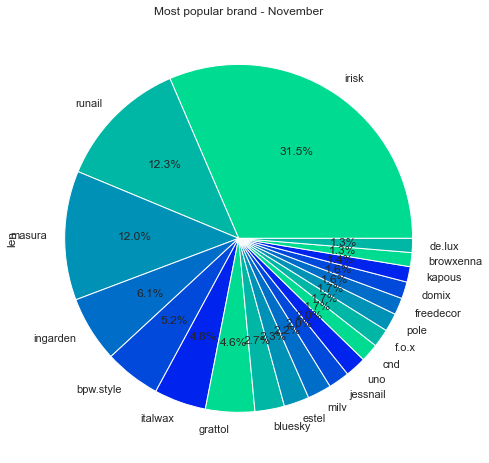

In [18]:
sns.set(rc={'figure.figsize':(13,8)})
purchases_with_brands = df_brand_sales.loc[df_brand_sales.brand.notnull()]
#purchases_with_brands = purchases_with_brands.loc[purchases_with_brands.category_code.notnull()]
top_sellers = purchases_with_brands.groupby('brand').brand.agg([len]).sort_values(by='len',ascending=False)
#top_sellers.head(20).plot.bar(color = 'orange')
palette_color = sns.color_palette('winter_r')
top_sellers.head(20).plot.pie(y='len',legend=False,autopct='%1.1f%%',shadow=False,startangle=0,colors = palette_color)
plt.title('Most popular brand - November')
#plt.xlabel('Brand name')
#plt.ylabel('No: of items purchased')

In [ ]:
top_sellers.head(20)

# Brand Analysis for df1

In [ ]:
df1.head()

In [20]:
df1 = df1.drop(columns=['category_code'],axis=1)

In [21]:
df1 = df1.dropna(subset=['brand'])

Text(0, 0.5, 'count')

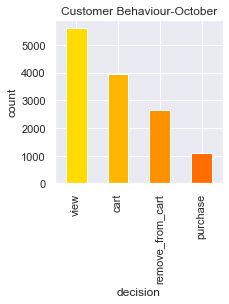

In [25]:
plt.figure(figsize=(3,3))
df1['event_type'].value_counts().plot.bar(color = palette_color)

plt.title('Customer Behaviour-October')
plt.xlabel('decision')
plt.ylabel('count')

In [26]:
df1['event_type'].value_counts()

view                5605
cart                3953
remove_from_cart    2662
purchase            1093
Name: event_type, dtype: int64

In [22]:
df1_brand_sales = df1.loc[df1['event_type']=='purchase']
df1_brand_sales.shape

(1093, 9)

In [ ]:
df1_brand_sales.shape

In [23]:
df1_brand_sales['brand'].value_counts()

runail         343
irisk           89
masura          89
bpw.style       51
bluesky         47
              ... 
chi              1
max              1
carmex           1
treaclemoon      1
lamixx           1
Name: brand, Length: 86, dtype: int64

Text(0.5, 1.0, 'Most popular brand - October')

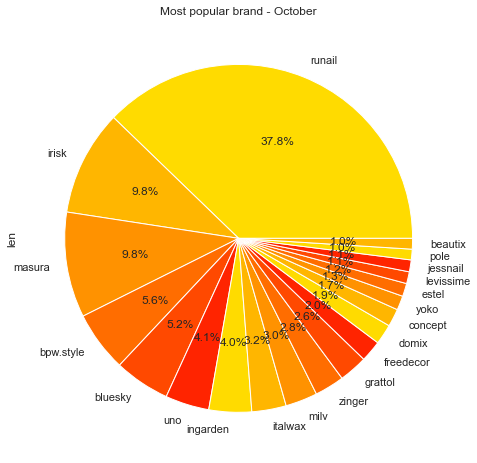

In [24]:
sns.set(rc={'figure.figsize':(12,8)})
purchases_with_brands_2 = df1_brand_sales.loc[df1_brand_sales.brand.notnull()]
#purchases_with_brands = purchases_with_brands.loc[purchases_with_brands.category_code.notnull()]
top_sellers = purchases_with_brands_2.groupby('brand').brand.agg([len]).sort_values(by='len',ascending=False)
palette_color = sns.color_palette('autumn_r')
top_sellers.head(20).plot.pie(y='len',legend=False,autopct='%1.1f%%',shadow=False,startangle=0,colors = palette_color)
plt.title('Most popular brand - October')
#plt.xlabel('Brand name')
#plt.ylabel('No: of items purchased')

In [ ]:
top_sellers.head(20)

# Brand  Analysis for df3

In [ ]:
df3.head()

In [27]:
df3 = df3.drop(columns=['category_code'],axis=1)

In [28]:
df3 = df3.dropna(subset=['brand'])

Text(0, 0.5, 'count')

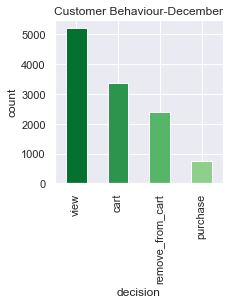

In [32]:
plt.figure(figsize=(3,3))
df3['event_type'].value_counts().plot.bar(color = palette_color)
plt.title('Customer Behaviour-December')
plt.xlabel('decision')
plt.ylabel('count')

In [33]:
df3['event_type'].value_counts()

view                5212
cart                3381
remove_from_cart    2406
purchase             764
Name: event_type, dtype: int64

In [29]:
df3_brand_sales = df3.loc[df3['event_type']=='purchase']
df3_brand_sales.shape

(764, 9)

In [30]:
df3_brand_sales['brand'].value_counts()

runail       125
bpw.style     77
grattol       55
freedecor     51
irisk         46
            ... 
balbcare       1
sanoto         1
gehwol         1
eunyul         1
candy          1
Name: brand, Length: 82, dtype: int64

Text(0.5, 1.0, 'Most popular brand - December')

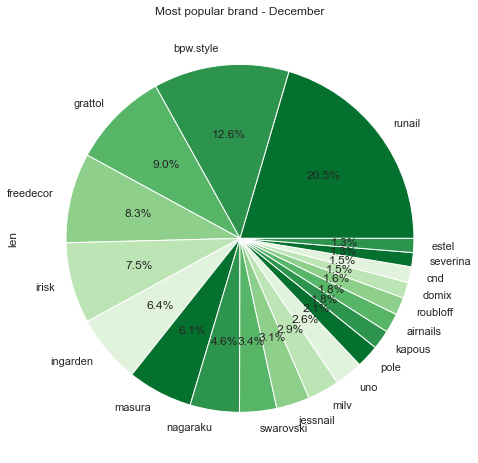

In [31]:
sns.set(rc={'figure.figsize':(15,8)})
purchases_with_brands_3 = df3_brand_sales.loc[df3_brand_sales.brand.notnull()]
#purchases_with_brands = purchases_with_brands.loc[purchases_with_brands.category_code.notnull()]
top_sellers = purchases_with_brands_3.groupby('brand').brand.agg([len]).sort_values(by='len',ascending=False)
#top_sellers.head(20).plot.bar(color = 'green')
palette_color = sns.color_palette('Greens_r')
top_sellers.head(20).plot.pie(y='len',legend=False,autopct='%1.1f%%',shadow=False,startangle=0,colors = palette_color)
plt.title('Most popular brand - December')
#plt.xlabel('Brand name')
#plt.ylabel('No: of items purchased')

# Popular product category df1

In [36]:
df1 = pd.read_csv('2019-oct1.csv')

In [37]:
df1['category_code'].unique()

array([nan, 'appliances.environment.vacuum', 'stationery.cartrige',
       'apparel.glove', 'accessories.bag',
       'furniture.living_room.cabinet', 'furniture.bathroom.bath',
       'appliances.personal.hair_cutter', 'accessories.cosmetic_bag',
       'appliances.environment.air_conditioner'], dtype=object)

In [39]:
df1_replaced = df1.replace(replace_category)

In [38]:
replace_category = {'category_code':{'appliances.environment.vacuum':'vaccum','stationery.cartrige':'cartrige','apparel.glove':'glove','accessories.bag':'bag','furniture.living_room.cabinet':'cabinet','furniture.bathroom.bath':'bath','appliances.personal.hair_cutter':'hair_cutter','accessories.cosmetic_bag':'cosmetic_bag','appliances.environment.air_conditioner':'air_conditioner','furniture.living_room.chair':'chair'}}

Text(0, 0.5, 'count')

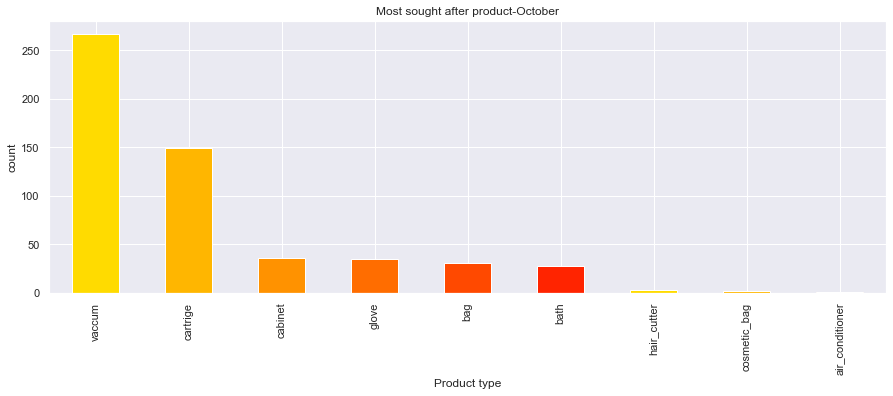

In [40]:

plt.figure(figsize=(15,5))
palette_color = sns.color_palette('autumn_r')
top_category_n = 30
top_category = df1_replaced.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
top_category.plot.bar(color = palette_color)
plt.title("Most sought after product-October")
plt.xlabel("Product type")
plt.ylabel("count")

# Popular product category df2

In [41]:
df2 = pd.read_csv('2019-nov1.csv')

In [42]:
df2['category_code'].unique()

array([nan, 'stationery.cartrige', 'appliances.environment.vacuum',
       'accessories.bag', 'furniture.living_room.cabinet',
       'apparel.glove', 'appliances.personal.hair_cutter',
       'furniture.bathroom.bath',
       'appliances.environment.air_conditioner',
       'furniture.living_room.chair', 'accessories.cosmetic_bag'],
      dtype=object)

In [43]:
df2_replaced = df2.replace(replace_category)

Text(0, 0.5, 'count')

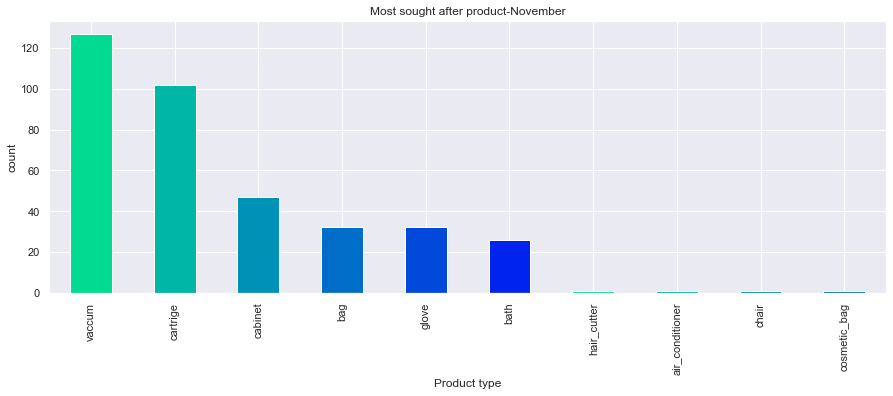

In [44]:

plt.figure(figsize=(15,5))
top_category_n = 30
top_category = df2_replaced.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
palette_color = sns.color_palette('winter_r')
top_category.plot.bar(color = palette_color)
plt.title("Most sought after product-November")
plt.xlabel("Product type")
plt.ylabel("count")

# Popular product category df3

In [45]:
df3 = pd.read_csv('2019-dec2.csv')

In [46]:
df3_replaced = df3.replace(replace_category)

Text(0, 0.5, 'count')

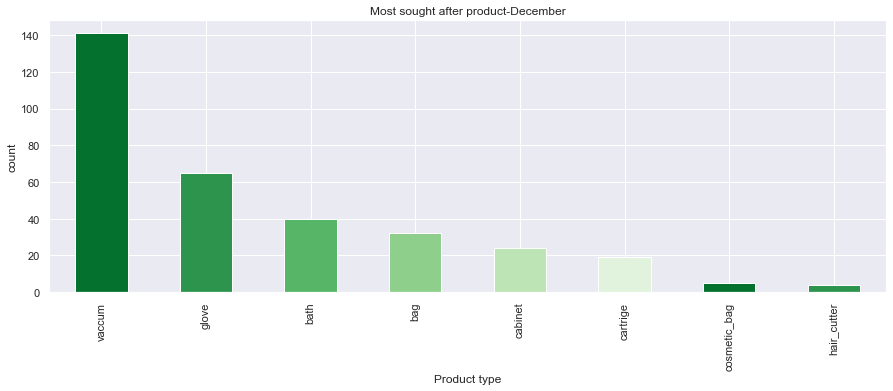

In [47]:

plt.figure(figsize=(15,5))
top_category_n = 30
top_category = df3_replaced.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
palette_color = sns.color_palette('Greens_r')
top_category.plot.bar(color = palette_color)
plt.title("Most sought after product-December")
plt.xlabel("Product type")
plt.ylabel("count")

# Conversion rate df1

In [48]:
df1.head()
df1.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

view count is  event_type    9371
dtype: int64
cart count is  event_type    6565
dtype: int64
purchase count is  event_type    1722
dtype: int64
Rate of conversion between view and purchase events event_type    18.37584
dtype: float64%
Rate of conversion between view and add to cart events event_type    70.056557
dtype: float64%
Rate of conversion between add to cart and purchase events event_type    26.230008
dtype: float64%


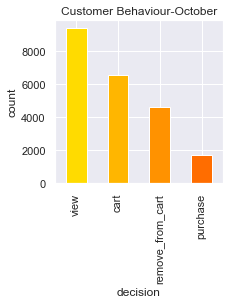

In [71]:
#df1_event_count = df1.drop(columns = ['Unnamed: 0','event_time','product_id','category_id','category_code','brand','price','user_id','user_session'],axis=1)
view_count = df1_event_count[df1_event_count['event_type']=='view'].count()
cart_count = df1_event_count[df1_event_count['event_type']=='cart'].count()
purchase_count = df1_event_count[df1_event_count['event_type']=='purchase'].count()
plt.figure(figsize=(3,3))
palette_color = sns.color_palette('autumn_r')
df1_event_count['event_type'].value_counts().plot.bar(color=palette_color)
plt.title('Customer Behaviour-October')
plt.xlabel('decision')
plt.ylabel('count')
print("view count is ",view_count)
print("cart count is ",cart_count)
print("purchase count is ",purchase_count)
print("Rate of conversion between view and purchase events " +str((purchase_count/view_count)*100) +'%')
print("Rate of conversion between view and add to cart events " +str((cart_count/view_count)*100) +'%')
print("Rate of conversion between add to cart and purchase events " +str((purchase_count/cart_count)*100) +'%')

In [55]:
type(view_count)

pandas.core.series.Series

# Conversion rate df2

view count is  event_type    9380
dtype: int64
cart count is  event_type    5485
dtype: int64
purchase count is  event_type    1401
dtype: int64
Rate of conversion between view and purchase events event_type    14.936034
dtype: float64%
Rate of conversion between view and add to cart events event_type    58.47548
dtype: float64%
Rate of conversion between add to cart and purchase events event_type    25.542388
dtype: float64%


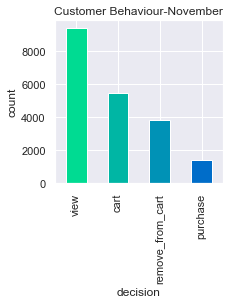

In [72]:
#df2_event_count = df2.drop(columns = ['Unnamed: 0','event_time','product_id','category_id','category_code','brand','price','user_id','user_session'],axis=1)
view_count = df2_event_count[df2_event_count['event_type']=='view'].count()
cart_count = df2_event_count[df2_event_count['event_type']=='cart'].count()
purchase_count = df2_event_count[df2_event_count['event_type']=='purchase'].count()
plt.figure(figsize=(3,3))
palette_color = sns.color_palette('winter_r')
df2_event_count['event_type'].value_counts().plot.bar(color=palette_color)
plt.title('Customer Behaviour-November')
plt.xlabel('decision')
plt.ylabel('count')
print("view count is ",view_count)
print("cart count is ",cart_count)
print("purchase count is ",purchase_count)
print("Rate of conversion between view and purchase events " +str((purchase_count/view_count)*100) +'%')
print("Rate of conversion between view and add to cart events " +str((cart_count/view_count)*100) +'%')
print("Rate of conversion between add to cart and purchase events " +str((purchase_count/cart_count)*100) +'%')

# Conversion rate df3

view count is  event_type    9050
dtype: int64
cart count is  event_type    5719
dtype: int64
purchase count is  event_type    1346
dtype: int64
Rate of conversion between view and purchase events event_type    14.872928
dtype: float64%
Rate of conversion between view and add to cart events event_type    63.19337
dtype: float64%
Rate of conversion between add to cart and purchase events event_type    23.535583
dtype: float64%


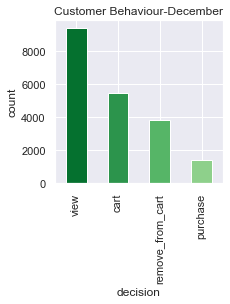

In [74]:
df3_event_count = df3.drop(columns = ['Unnamed: 0','event_time','product_id','category_id','category_code','brand','price','user_id','user_session'],axis=1)
view_count = df3_event_count[df3_event_count['event_type']=='view'].count()
cart_count = df3_event_count[df3_event_count['event_type']=='cart'].count()
purchase_count = df3_event_count[df3_event_count['event_type']=='purchase'].count()
plt.figure(figsize=(3,3))
palette_color = sns.color_palette('Greens_r')
df2_event_count['event_type'].value_counts().plot.bar(color=palette_color)
plt.title('Customer Behaviour-December')
plt.xlabel('decision')
plt.ylabel('count')
print("view count is ",view_count)
print("cart count is ",cart_count)
print("purchase count is ",purchase_count)
print("Rate of conversion between view and purchase events " +str((purchase_count/view_count)*100) +'%')
print("Rate of conversion between view and add to cart events " +str((cart_count/view_count)*100) +'%')
print("Rate of conversion between add to cart and purchase events " +str((purchase_count/cart_count)*100) +'%')